Do operacji na grafach posłuży biblioteka networkx.

In [1]:
import networkx as nx

Pusty graf tworzy się przy pomocy wywołania konstruktora Graph.

In [21]:
G = nx.Graph()

W celu dodania pojedynczego wierzchołka do grafu służy metoda add_node(). Do metody przekazujemy pojedynczą wartość, która posłuży jako etykieta dla wierzchołka.

Można jednocześnie dodać również wiele wierzchołków przy pomocy metody add_nodes_from(), do której przekazuje się np. listę (musi to być struktura iterowalna), z której każdy kolejny element będzie służył za wierzchołek.

In [23]:
G.add_node(1) #dodanie wierzchołka o etykiecie 1
G.add_nodes_from([2,3]) #dodanie dwóch wierzchołków 2 i 3.

Wierzchołki mogą przechowywać dodatkowo wartości. Wierzchołek z atrybutem przekazuje się w postaci krotki, gdzie pierwsza wartość krotki to etykieta, a druga wartość to słownik z nazwą i wartością.

In [27]:
G.add_nodes_from([
    (4, {"color" : "green"}), #dodanie wierzchołka 4 przechowującego dodatkowo atrybut color o wartości green
    (5, {"color" : "blue"}) #dodanie wierzchołka 5 przechowującego dodatkowo atrybut color o wartości blue
])

In [29]:
H = nx.Graph()

H.add_nodes_from([6,7,8,9,10,11])

Dodatkowo do metody add_nodes_from można przekazać inny graf. Dzięki temu wierzchołki zostaną dodane do docelowego grafu. 

In [32]:
G.add_nodes_from(H)

In [ ]:
for i in G:
    print(i)

Krawędzi pomiędzy wierzchołkami dodaje się przy pomocy metody add_edge. Przekazane zostają dwa argumenty, które służą do wskazania etykiet wierzchołków, pomiędzy którymi ma znaleźć się krawędź.

In [41]:
G.add_edge(1, 2) #dodanie krawędzi pomiędzy wierzchołkami 1 i 2
G.add_edge(2,1) #ze względu na to, że nie jest to graf, w którym kierunek ma znaczenie, to ta krawędź nie zostanie dodana, bo istnieje już krawędź pomiędzy wierzchołkami 1 i 2.

Tak jak w przypadku wierzchołków istnieje metoda, która pozwala na dodawanie jednocześnie wielu krawędzi. add_edges_from również przyjmuje iterowalną strukturę, do której w postaci krotek dodaje się kolejne krawędzi. Jeżeli wierzchołek nie istnieje w trakcie dodawania krawędzi, to zostanie on automatycznie dodany.

In [39]:
G.add_edges_from([(1,3), (2,3)]) #dodanie krawędzi pomiędzy wierzchołkami 1 - 3 i 2 - 3.

In [ ]:
print(G.edges([1])) #wyświetlenie wszystkich krawędzi, które przylegają do danego wierzchołka.

In [ ]:
print(f"Liczba wierzchołków: {G.number_of_nodes()}") #dostęp do liczby wierzchołków w grafie
print(f"Liczba krawędzi: {G.number_of_edges()}") #dostęp do liczby krawędzi w grafie

In [ ]:
print(f"Wierzchołki w grafie G: {G.nodes}") #dostęp do wierzchołków w grafie
print(f"Krawędzi w grafie G: {G.edges}") #dostęp do krawędzi w grafie
print(f"Wierzchołki sąsiadujące z wierzchołkiem 1: {list(G.adj[1])}") #lista wierzchołków sąsiadujących ze wskazanym wierzchołkiem
print(f"Liczba stopni wierzchołka 1: {G.degree[1]}") #stopień oznacza z iloma wierzchołkami sąsiaduje dany wierzchołek. 

In [ ]:
print(G.edges([1, 2])) #wyświetlenie dostępnych krawędzi dla wskazanych wierzchołków
print(G.degree([1, 2])) #wyświetlenie stopnia dla wskazanych wierzchołków

Metoda clear pozwala na usunięcie wszystkich wierzchołków i krawędzi z grafu.

In [ ]:
G.clear()
print(G.nodes, G.edges)

In [ ]:
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2), (1,3), (1,4), (1,5)])
print(f"Wierzchołki po dodaniu: {G.nodes}, krawędzi po dodaniu: {G.edges}.")
G.remove_nodes_from([2,3,4])
print(f"Pozostałe wierzchołki: {G.nodes}, pozostałe krawędzi: {G.edges}.")
G.remove_edge(1,5)
print(f"Pozostałe wierzchołki po usunięciu krawedzi (1, 5): {G.nodes}, pozostałe krawędzi {G.edges}.")

In [ ]:
G = nx.Graph([(1, 2, {"color": "blue"})])
print(G.nodes, G.edges)
print(G[1])
print(G[1][2])
print(G.edges[1, 2])

In [ ]:
G.add_edge(1,3)
G[1][3]['color'] = "red"
print(G.edges[1, 3])
G.edges[1, 3]['color'] = "green"
print(G.edges[1, 3])

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 1), (2, 3, 2), (3, 4, 4), (1, 3, 5), (4, 5, 10)])
print(G.edges, G.nodes)

for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        print(f"Wierzchołek: {n} -> Sąsiad {nbr}, waga krawędzi = {wt}")

In [ ]:
for (n, nbr, wt) in G.edges.data('weight'):
    print(f"Wierzchołek: {n} -> Sąsiad {nbr}, waga krawędzi = {wt}")

In [ ]:
G = nx.Graph()

G.add_node(1, variable = 1)
G.add_nodes_from([2,3], variable = 2)
print(G.nodes[1])
for (n, wt) in G.nodes.data('variable'):
    print(f"Wierzchołek: {n}, waga wierzchołka = {wt}")

G.nodes[1]['color'] = "red"

print("Waga:",G.nodes[1]['variable'])
print("Kolor:",G.nodes[1]['color'])

In [ ]:
G = nx.Graph()

G.add_edge(1, 2, variable = 1)
G.add_edges_from([(2, 3), (3, 4)], variable = 2)
G.add_edges_from([(1, 3, {"variable": 3}), (1, 4, {"variable": 4})])

for n, wt in G.nodes.data('variable'):
    print(f"Wierzchołek: {n}, waga wierzchołka = {wt}")

for n, nbr, wt in G.edges.data('variable'):
    print(f"Wierzchołek: {n}, sąsiad: {nbr}, waga krawędzi = {wt}")

G.edges

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5, 1)])
x = plt.subplot()
nx.draw(G, with_labels=True)

Zadania

1. Wyświetl graf, którego wierzchołki będą łączyły się następująco:

a -> b -> c -> d -> e

b -> a -> c - > d 

c -> a -> e

d -> a -> b 

e -> a - > c

In [ ]:
G = nx.Graph()
G.add_edges_from([('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'd'), ('c', 'e'), ('a', 'e'), ('b', 'c')])
nx.draw(G, with_labels=True)

2. Wyświetl graf, którego wierzchołki będą łączyły się następująco:

[0 1 1 0 0 0 1 0 1]

[1 0 0 1 0 0 0 1 0]

[1 0 0 1 1 0 0 0 0]

[0 1 1 0 0 0 0 0 0]

[0 0 1 0 0 1 0 0 0]

[0 0 0 0 1 0 1 0 0]

[1 0 0 0 0 1 0 0 0]

[0 1 0 0 0 0 0 0 1]

[1 0 0 0 0 0 0 1 0]

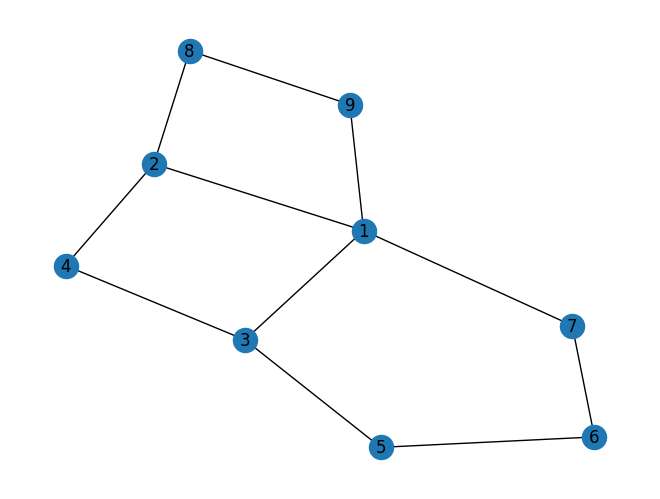

In [3]:
G = nx.Graph()
G.add_edges_from([(8,9), (8,2), (2,1), (2,4), (1,3), (4,3), (3, 1), (1, 9), (1, 7), (7, 6), (6, 5), (5, 3)]) #kolejność dodawania wierzchołków losowa (nie należy się sugerować)
nx.draw(G, with_labels = True)

3. Napisz funkcję, która jako argument przyjmie graf, a następnie zwróci dwie zmienne: liste przechowującą nazwę wierzchołka i liczbę sąsiadów oraz druga zmienna to "szerokość grafu" (po angielsku diameter).

In [81]:
def function(G):
    lista = []
    counter = 0
    for node in G.nodes():
        lista.append([node, G.degree(node)])
    return lista, nx.diameter(G)
lista, diameter  = function(G)

for i in lista:
    print(i)
print(diameter)

[1, 2]
[2, 2]
[3, 2]
[4, 2]
[5, 2]
2


4.
4.1. Jaka jest najdłuższa trasa pomiędzy miastami?

4.2. Z jakich miast średnio jest najkrótsza droga do pozostałych punktów?

4.3. Poszerzając punkt 2 wybierz miasto, które ma najwięcej sąsiadów. Zwróc nazwę miasta oraz listę miast sąsiadujących.

In [1]:
cities =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), 
                      ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), 
                      ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), 
                      ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), 
                      ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), 
                      ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'),
                      ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]


In [ ]:
#1
print(nx.diameter(G))

In [ ]:
#2
print(nx.center(G))

In [ ]:
#3
def node_neighbours(G):
    neighbours = 0
    neighbours_list = []
    name = ""
    for node in nx.center(G):
        if len(G.adj[node]) > neighbours:
            neighbours = len(G.adj[node])
            neighbours_list = list(G.adj[node])
            name = node
    return (name, neighbours_list)
print(node_neighbours(G))

5.

Utwórz graf z pięcioma wierzchołkami. Wierzchołki powinne być ponumerowane rosnąco (1, 2, 3 , 4 , 5). Każdemu z wierzchołków przypisz atrybut kolor, z inną wartością np. (black, red, pink, green, blue). Następnie połącz krawędziami kolejno wierzchołki (wierzchołek 1 z wierzchołkiem 2, wierzchołek 2 z wierzchołkiem 3 ... wierzchołek 5 z wierzchołkiem 1).

Następnie narysuj graf w taki sposób, żeby każdy z wierzchołków miał odpowiadający kolor temu z atrybutu.

Podpowiedź: node_color z metody draw może przyjąć tablicę, która posłuży za sekwencję kolorów do wyświetlenia.

In [ ]:
G = nx.Graph()
G.add_node(1, color = "red")
G.add_node(2, color = "green")
G.add_node(3, color = "blue")
G.add_node(4, color = "red")
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

colors = nx.get_node_attributes(G, "color")

colors_array = []
for node in G.nodes(data=True):
    colors_array.append(node[1]['color'])

#nx.draw(G, with_labels = True, node_color = [colors[i] for i in range(1, len(colors) + 1)]) 
#nx.draw(G, with_labels = True, node_color = [G.nodes(data=True)[node[0]]['color'] for node in G.nodes(data=True)])
nx.draw(G, with_labels = True, node_color = colors_array)

In [ ]:
print([G.nodes(data=True)[node[0]]['color'] for node in G.nodes(data=True)])

6.

6.1 Utwórz graf z minimum 8 wierzchołkami, niech minimalna liczba sąsiadów dla wierzchołka to będzie 2. Każdej krawędzi przypisz wybraną wagę.

6.2 Napisz funkcję, w której jako parametry podasz graf oraz wierzchołek grafu. Niech funkcja zwróci sumę wag krawędzi z sąsiadami.

In [7]:
G = nx.Graph()

G.add_edges_from([(1, 2, {"weight": 3}),(2, 3, {"weight": 1}), (3, 4, {"weight": 5}), 
                  (4, 5, {"weight": 4}), (5, 6, {"weight": 11}), (6, 7, {"weight": 2}), (7, 8, {"weight": 4}), (8, 1, {"weight": 7})])

In [10]:
def sum_weights(G, node):
    sum = 0
    for edge in G.edges(node):
        print(edge, G[edge[0]][edge[1]]["weight"])
        sum += G[edge[0]][edge[1]]["weight"]
    return sum

print(sum_weights(G, 3))

(3, 2) 1
(3, 4) 5
6
